# DataFrame(데이터프레임)

## DataFrame 개요
- 표(테이블-행렬)를 다루는 Pandas 클래스
    - 데이터베이스의 Table이나 R의 data.frame이나 Excel의 표와 동일한 역할
- 분석할 데이터를 가지는 판다스의 가장 핵심적인 클래스
- 행이름: index 열이름: column
    - 행이름과 열이름은 명시적으로 지정할 수 있다.
    - 명시적으로 지정하지 않으면 순번 (0부터 1씩 증가) 이 index, column 명으로 사용된다.
    - 하나의 행과 하나의 열은 Series로 구성된다.
- 직접 데이터를 넣어 생성하거나 데이터 셋을 파일(csv, 엑셀, DB 등)로 부터 읽어와 생성한다.

## DataFrame 생성
###  직접 생성
- `pd.DataFrame(data [, index=None, columns=None])`
- data 
    - DataFrame을 구성할 값을 설정
        - Series, List, ndarray를 담은 2차원 배열
        - 열이름을 key로 컬럼의 값 value로 하는 딕션어리(사전)
    - index
        - index명으로 사용할 값 배열로 설정
    - columns
        - 컬럼명으로 사용할 값 배열로 설정

### DataFrame 파일로 저장

- ### DataFrame객체.to_파일타입()
- DataFrame객체.to_csv(파일경로,sep=',', index=True, header=True, encoding)
    - 텍스트 파일로 저장
    - 파일경로: 저장할 파일경로(경로/파일명)
    - sep : 데이터 구분자
    - index, header: 인덱스/헤더 저장 여부
    - encoding
        - 파일인코딩
        - 생략시 운영체제 기본 encoding 방식
    
- DataFrame객체.to_excel(파일경로, index=True, header=True)
    - 엑셀파일로 저장

### 파일로 부터 데이터셋을 읽어와 생성하기
### csv 파일 등 텍스트 파일로 부터 읽어와 생성
- `pd.read_csv(파일경로, sep=',', header, index_col, na_values, encoding)`
    - 파일경로 : 읽어올 파일의 경로
    - sep
        - 데이터 구분자. 
        - 기본값: 쉼표
    - header=정수
        - 열이름(컬럼이름)으로 사용할 행 지정
        - 기본값: 첫번째 행
        - None 설정: 첫번째 행부터 데이터로 사용하고 header(컬럼명)는 0부터 자동증가하는 값을 붙인다.
    - index_col=정수,컬럼명
        - index 명으로 사용할 열이름(문자열)이나 열의 순번(정수)을 지정.
        - 생략시 0부터 자동증가하는 값을 붙인다.
    - na_values
        - 읽어올 데이터셋의 값 중 결측치로 처리할 문자열 지정. 
    - encoding
        - 파일 인코딩
        - 생략시 운영체제 기본 encoding 방식

### 엑셀파일 읽기

### TODO 파일로 저장

In [ ]:
#1. data/movie.csv 를 읽어서 데이터프레임 생성

#1의 데이터프레임을 csv 파일로 저장(파일명 : movie_df1.csv)

#1의 데이터프레임을 엑셀파일로 저장(파일명 : movie_df1.xlsx)


## 주요 메소드, 속성 

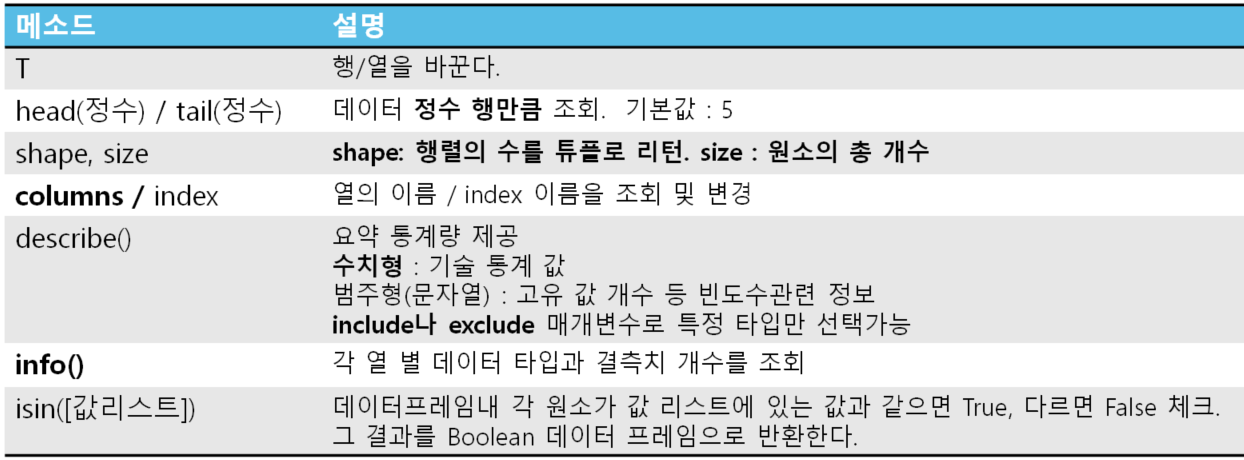

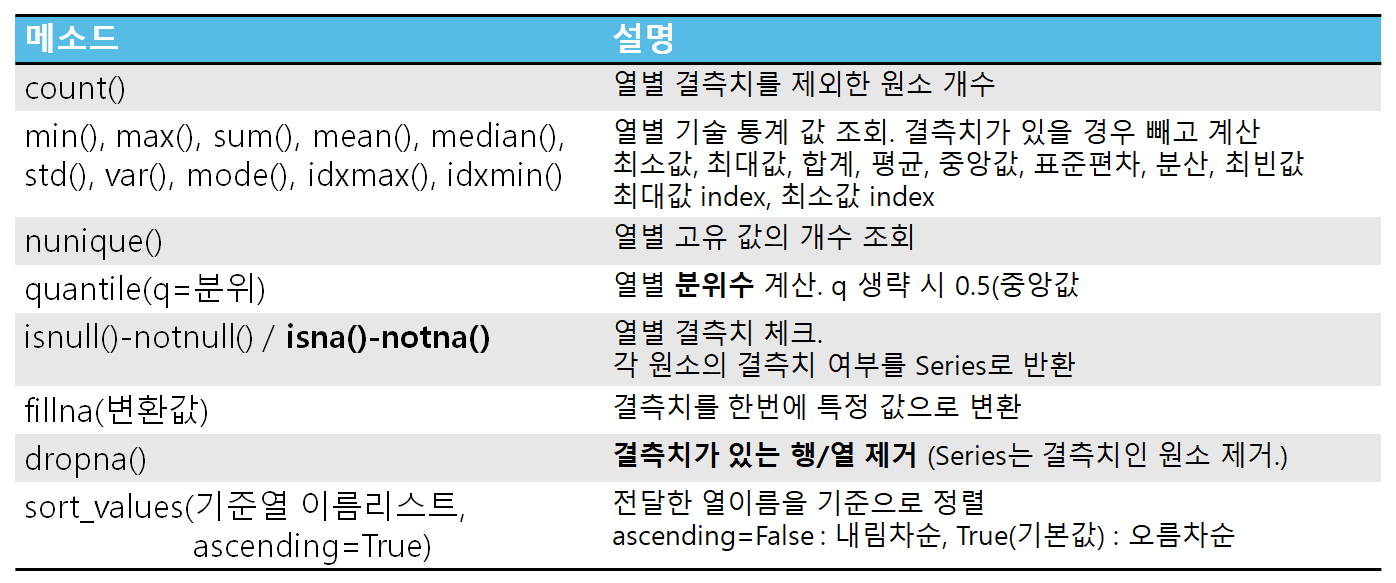

## 데이터 프레임의 기본 정보 조회
- csv 파일 읽기
- shape
- head()
- tail()
- info()
- isnull().sum() => 컬럼별 null 체크 (sum() 한번더 하면 총개수)
- index / columns : index와, 컬럼명 조회
- describe() : 숫자형-기술통계값, 문자열-총개수, 유니크값, 최빈값

## 컬럼이름/행이름 조회 및 변경
### 컬럼이름/행이름 조회
- DataFrame객체.columns
    - 컬럼명 조회
    - 컬럼명은 차후 조회를 위해 따로 변수에 저장하는 것이 좋다.
- DataFrame객체.index
    - 행명 조회

### 컬럼이름/행이름 변경
- 컬럼과 인덱스는 불변의 성격을 가짐
- columns와 index 속성으로는 통째로 바꾸는 것은 가능하나 index로 하나씩 바꾸는 것은 안된다.
    - `df.columns = ['새이름','새이름', ... , '새이름']
    - `df.columns[1] = '새이름' # 이건 안된다. `

### 컬럼이름/행이름 변경 관련 메소드    
- `DataFrame객체.rename(index=행이름변경설정, columns=열이름변경설정, inplace=False)`
    - 개별 컬럼이름/행이름 변경 하는 메소드
    - 변경한 DataFrame을 반환
    - 변경설정: 딕셔너리 사용
        - {'기존이름':'새이름', ..}
        - inplace: 원본을 변경할지 여부(boolean)
- `DataFrame객체.set_index(컬럼이름, inplace=False)`
    - 특정 컬럼을 행의 index 명으로 사용
    - 열이 index명이 되면서 그 컬럼은 Data Set 에서 제거된다.
- `DataFrame객체.reset_index(inplace=False)`
    - index를 첫번째 컬럼으로 복원

## 행 / 열 삭제
- DataFrame객체.drop(columns, index, inplace=False)
    - columns : 삭제할 열이름 또는 열이름 리스트
    - index : 삭제할 index명 또는 index 리스트
    - inplace: 원본을 변경할지 여부(boolean)

## 열 추가
- 새로운 열을 지정 후 값을 대입하면 새로운 열을 추가할 수 있다.
    - 보통 파생변수를 만들 때 사용한다.
- df['새열명'] = 값
    - 마지막 열로 추가된다.
    - 하나의 값을 대입하면 모든 행에 그 값이 대입된다.
    - 다른 값을 주려면 배열에 담아서 대입한다.
- 기존 열들의 값을 이용한 새로운 열 생성
    - 벡터 연산을 이용하여 값 대입
    - df[‘새열이름‘] = 기존 열들을 이용한 연산

## TODO
- 패스 여부를 boolean값으로 저장하는 컬럼을 추가
    - 컬럼명: pass
    - 기준: 평균점수가 80미만이면 False,이상이면 True가 나오도록 처리

# 행별, 열별 값 조회
## 열(컬럼) 조회 - Series로 리턴
- **df['컬럼명']**
- **df.컬럼명**
- **팬시 indexing**
    - 여러개의 컬럼을 조회할 경우 컬럼명들을 담은 리스트/튜플로 조회
- 주의
    - df[컬럼index] 는 안된다.
    - df[0:3] 슬라이싱은 **행** 조회다.
    - **만약 indexing이나 slicing을 이용해 컬럼값 조회하려면 columns 속성을 이용한다.**
        - `df[df.columns[:3]]`

## TODO
- 다음 movie_df를 이용해 코드를 작성
- 조회결과는 head() 메소드를 이용해 5행만 조회

In [ ]:
# TODO:  director_name 컬럼의 값들 조회


In [ ]:
# TODO: actor_1_name, actor_2_name, actor_3_name 컬럼의 값들 


In [ ]:
#TODO: 1, 3, 4, 7 번째 컬럼 조회('director_name', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes')


In [ ]:
#TODO: 1 ~ 5 번째 컬럼 조회('director_name', 'num_critic_for_reviews', 'duration', director_facebook_likes', 'actor_3_facebook_likes')


### 다양한 열선택 기능을 제공하는 메소드들
- `select_dtypes(include=[데이터타입,..], exclude=[데이터타입,..])`
    - 전달한 데이터 타입의 열들을 조회. 
    - include : 조회할 열 데이터 타입
    - exclude : 제외하고 조회할 열 데이터 타입
- `filter (items=[], like='', regex='')`
   - 매개변수에 전달하는 열의 이름에 따라 조회
    - 각 매개변수중 하나만 사용할 수 있다.
    - items = [ ] 
        - 리스트와 일치하는 열들 조회
        - 이름이 일치 하지 않아도 Error 발생안함.
    - like = “ “ 
        - 전달한 문자열이 들어간 열들 조회
        - 부분일치 개념
    - regex = “ ”
        - 정규 표현식을 이용해 열명의 패턴으로 조회

# TODO
다음은 movie_df(df)를 이용해 코드를 작성

In [ ]:
# TODO : 정수형(int64) 컬럼만 조회

In [ ]:
# TODO: 정수형(int64)과 실수형(float64) 타입을 제외한 컬럼들만 조회

In [ ]:
# TODO: actor_1_name, actor_2_name, actor_3_name 컬럼의 값을 조회

In [ ]:
# TODO: actor_1_facebook_likes, actor_1_name 컬럼의 값을 조회

In [ ]:
# TODO: color, director 컬럼을 조회. 없는 컬럼명이라도 에러가 안나도록 조회하시오.

In [ ]:
# TODO: movie가 들어가는 컬럼들을 조회.

## 행 조회

- **loc** :  index 이름으로 조회
- **iloc** : 행 순번으로 조회


### loc : 행 이름으로 조회
- `DF.loc[ index이름 ]`
    - 한 행 조회.
    - 조회할 행 index 이름(레이블) 전달
    - 이름이 문자열이면 " " 문자열표기법으로 전달. 정수이며 정수표기법으로 전달한다.
- `DF.loc[ index이름 리스트 ]`
    - 여러 행 조회. 
    - 팬시 인덱스
    - 조회할 행 index 이름(레이블) 리스트 전달
- `DF.loc[start index이름 : end index이름: step]`
    - 슬라이싱 지원
    - end index 이름의 행까지 포함한다.
- `DF.loc[index이름 , 컬럼이름]`
    - 행과 열 조회
    - 둘다 이름으로 지정해야 함.

### iloc : 행 순번으로 조회
- `DF.iloc[행번호]`
    - 한 행 조회.
    - 조회할 행 번호 전달
- `DF.iloc[ 행번호 리스트 ]`
    - 여러 행 조회.
    - 조회할 행 번호 리스트 전달
- `DF.iloc[start 행번호: stop 행번호: step]`
    - 슬라이싱 지원
    - stop 행번호 포함 안함.
- `DF.loc[행번호 , 열번호]`  
    - 행과 열 조회
    - 행열 모두 순번으로 지정

### TODO
- movie_df를 이용해 loc과 iloc관련해 다음을 작성

In [ ]:
#TODO:  movie_title 컬럼을 index명으로 지정


In [ ]:
#TODO:  행이름이 Avatar인 행 조회


In [ ]:
#TODO:  행이름이 Spider-Man 3, The Avengers, Titanic 인 행 조회


In [ ]:
#TODO:  행이름 Spectre ~ Robin Hood 까지 범위로 조회


In [ ]:
#TODO:  행이름이 John Carter 이고 열이름이 director_name 인 값 조회 - John Carter의 감독이름


In [ ]:
#TODO:  1번행 조회


In [ ]:
#TODO:  마지막 행 조회


In [ ]:
#TODO:  1, 2, 5, 6, 9 번행 조회


In [ ]:
#TODO:  10 ~ 20 행 조회


In [ ]:
#TODO:  movie_df에서 5 ~ 10 행의 color,director_name,num_critic_for_reviews 컬럼(0,1,2번째 컬럼)을 iloc을 이용해 조회


## Boolean indexing을 이용한 조회
- 행, 열에 조건식을 이용해 원하는 조건의 행이나 열을 조회
- 다중 조건의 경우 ( )로 묶는다.
- 논리연산자
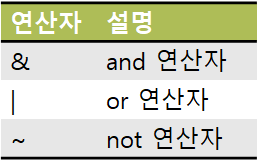

- DataFrame객체[조건], DataFrame객체.loc[조건]
    - 조건이 True인 행만 조회
    - 열까지 선택시
        - DataFrame객체[조건][열]
        - DataFrame객체.loc[조건, 열]
- **iloc[]**은 boolean indexing을 **지원하지 않는다.**

## TODO

In [ ]:
#TODO:  상영시간 (duration)이 300 이상인 영화들 조회


In [ ]:
#TODO:  상영시간 (duration)이 300 이상인 영화들의 영화제목(movie_title)과 감독이름(director_name) 조회


In [ ]:
#TODO:  감독이름(director_name)이 'Quentin Tarantino' 의 영화들만 조회


In [ ]:
# TODO: James Cameron의 영화중 상영시간이 150분 이상인 영화들의 제목(movie_title), 상영시간(durations), 컬러여부(color) 조회
